In [296]:
#data set name Social_Network_Ads.csv

In [297]:
import pandas as pd
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [298]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [300]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [301]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [302]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gender_encoded'] = encoder.fit_transform(df['Gender'])

df['Gender_encoded']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender_encoded, Length: 400, dtype: int32

In [303]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [304]:
X = df[[ 'Gender_encoded','Age', 'EstimatedSalary']]
y = df['Purchased']

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)  


knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

y_pred


array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [307]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.80


In [308]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Gender_encoded'],
      dtype='object')

In [309]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


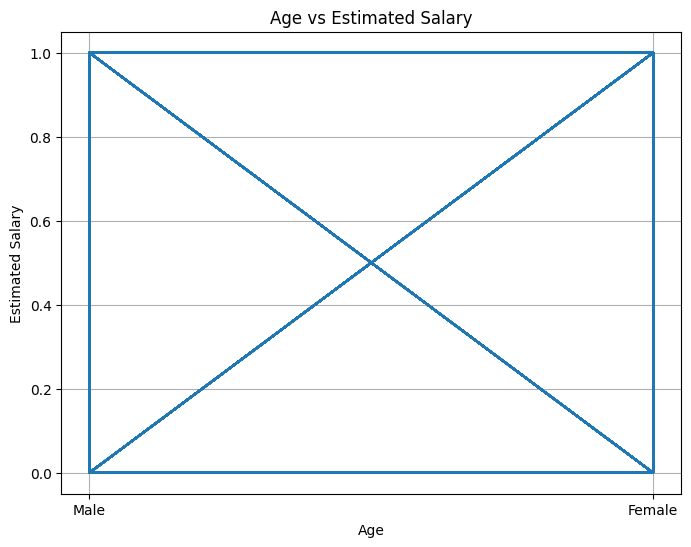

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot (instead of scatter plot for trends)
plt.figure(figsize=(8, 6))
plt.plot(df['Gender'], df['Purchased'])

plt.title("Age vs Estimated Salary")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.show()


In [311]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



print("Classification Report:\n", classification_report(y_test, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        52
           1       0.75      0.64      0.69        28

    accuracy                           0.80        80
   macro avg       0.79      0.76      0.77        80
weighted avg       0.80      0.80      0.80        80

Confusion Matrix:
 [[46  6]
 [10 18]]


SVM classifier

In [312]:
# Data Set name heart.csv

In [313]:
import pandas as pd
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,Yes


In [314]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

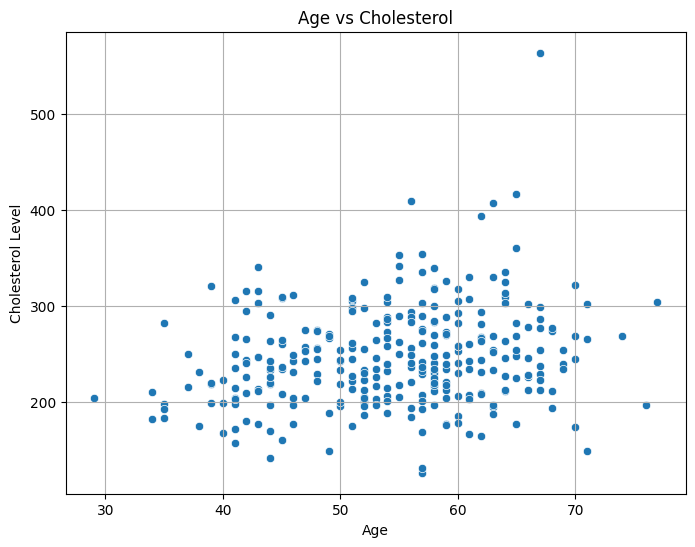

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Chol'])

plt.title("Age vs Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")
plt.grid(True)
plt.show()


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [317]:
df["AHD"].value_counts()

AHD
No     164
Yes    139
Name: count, dtype: int64

In [318]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [319]:
import pandas as pd

df['ahd_encoded'] = df['AHD'].map({'No': 0, 'Yes': 1})

print(df[['AHD', 'ahd_encoded']])


     AHD  ahd_encoded
0     No            0
1    Yes            1
2    Yes            1
3     No            0
4     No            0
..   ...          ...
298  Yes            1
299  Yes            1
300  Yes            1
301  Yes            1
302   No            0

[303 rows x 2 columns]


In [320]:
X = df[['Age', 'Sex',  'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca']]
y = df['ahd_encoded']

In [321]:
df.drop(["AHD"],axis=1,inplace=True)
df.drop(["ChestPain"],axis=1,inplace=True)
df.drop(["Thal"],axis=1,inplace=True)

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
df

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ahd_encoded
0,63,1,145,233,1,2,150,0,2.3,3,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,1
2,67,1,120,229,0,2,129,1,2.6,2,2,1
3,37,1,130,250,0,0,187,0,3.5,3,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,0,132,0,1.2,2,0,1
299,68,1,144,193,1,0,141,0,3.4,2,2,1
300,57,1,130,131,0,0,115,1,1.2,2,1,1
301,57,0,130,236,0,2,174,0,0.0,2,1,1


In [339]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='rbf',C = 10, random_state=42)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred


array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [340]:


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")



Accuracy: 0.69


In [341]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.86      0.72        29
           1       0.81      0.53      0.64        32

    accuracy                           0.69        61
   macro avg       0.72      0.70      0.68        61
weighted avg       0.72      0.69      0.68        61



In [342]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[25  4]
 [15 17]]
